            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


/opt/anaconda/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


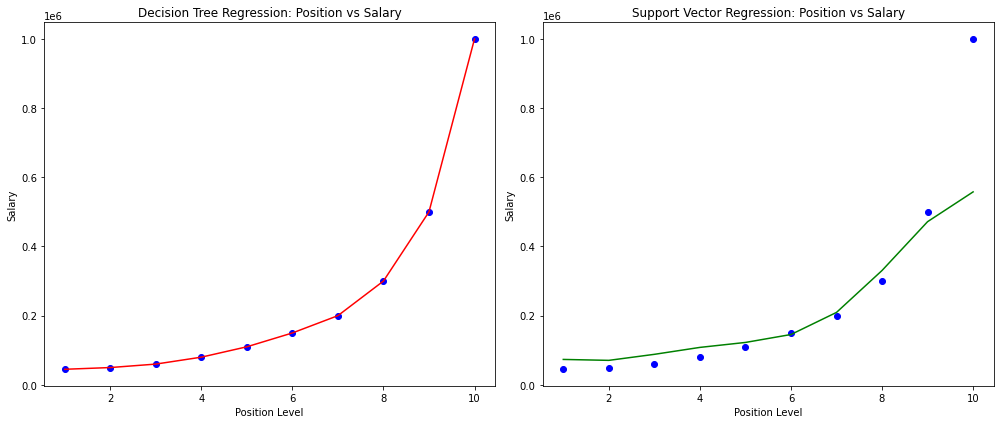

Predicted Salary for Position Level 6.5 using Decision Tree: 150000.0
Predicted Salary for Position Level 6.5 using Support Vector Regression: 170370.02040650236


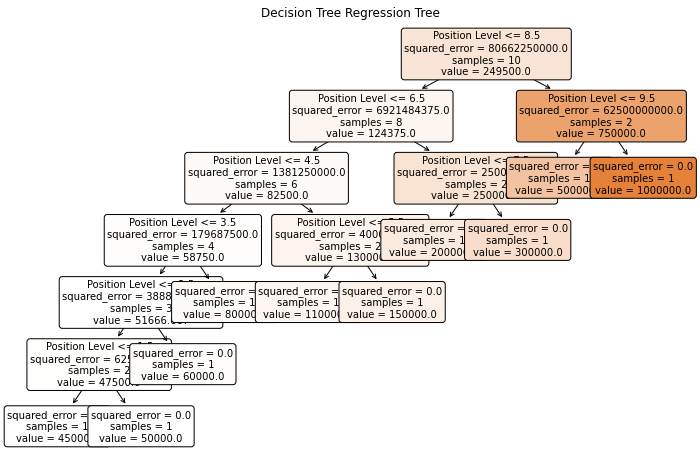

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree


data = pd.read_csv('Position_Salaries.csv')

print(data.head())

X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values    

sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1))


decision_tree_model = DecisionTreeRegressor(random_state=0)
decision_tree_model.fit(X, y)


y_pred_tree = decision_tree_model.predict(X)


svr_model = SVR(kernel='rbf')
svr_model.fit(X_scaled, y_scaled)


y_pred_svr = sc_y.inverse_transform(svr_model.predict(sc_X.transform(X)).reshape(-1, 1))


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred_tree, color='red')
plt.title('Decision Tree Regression: Position vs Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')


plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred_svr, color='green')
plt.title('Support Vector Regression: Position vs Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.tight_layout()
plt.show()


position_level = 6.5
salary_pred_tree = decision_tree_model.predict([[position_level]])
salary_pred_svr = sc_y.inverse_transform(svr_model.predict(sc_X.transform([[position_level]])).reshape(-1, 1))

print(f"Predicted Salary for Position Level {position_level} using Decision Tree: {salary_pred_tree[0]}")
print(f"Predicted Salary for Position Level {position_level} using Support Vector Regression: {salary_pred_svr[0][0]}")


plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, filled=True, feature_names=["Position Level"], 
          class_names=["Salary"], rounded=True, fontsize=10)
plt.title("Decision Tree Regression Tree")
plt.show()
